In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Necessary Libraries

In [ ]:
import numpy as np
import torch
from torchvision import datasets, transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from random import shuffle
import pandas as pd
from torch.utils.data import Dataset
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Dataset Handling

## Unzipping the Dataset File

In [ ]:
!unzip '/content/drive/MyDrive/DL_Assignment_2/kagglecatsanddogs_3367a.zip' -d '/content/drive/MyDrive/DL_Assignment_2/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/DL_Assignment_2/PetImages/Dog/5500.jpg  
  inflating: /content/drive/MyDrive/DL_Assignment_2/PetImages/Dog/5501.jpg  
  inflating: /content/drive/MyDrive/DL_Assignment_2/PetImages/Dog/5502.jpg  
  inflating: /content/drive/MyDrive/DL_Assignment_2/PetImages/Dog/5503.jpg  
  inflating: /content/drive/MyDrive/DL_Assignment_2/PetImages/Dog/5504.jpg  
  inflating: /content/drive/MyDrive/DL_Assignment_2/PetImages/Dog/5505.jpg  
  inflating: /content/drive/MyDrive/DL_Assignment_2/PetImages/Dog/5506.jpg  
  inflating: /content/drive/MyDrive/DL_Assignment_2/PetImages/Dog/5507.jpg  
  inflating: /content/drive/MyDrive/DL_Assignment_2/PetImages/Dog/5508.jpg  
  inflating: /content/drive/MyDrive/DL_Assignment_2/PetImages/Dog/5509.jpg  
  inflating: /content/drive/MyDrive/DL_Assignment_2/PetImages/Dog/551.jpg  
  inflating: /content/drive/MyDrive/DL_Assignment_2/PetImages/Dog/5510.jpg  
  inflating: /content/driv

## Function to Split the Dataset into Train and Test portions alongside creating meta-file (Images and Labels)

In [ ]:
def train_test_split(directory_origin, directory_new_train, directory_new_test, class_name, test_size=0.1, shuffle_option=False):
  count=0
  if shuffle_option!=True:
    list_images = os.listdir(directory_origin)
  else:
    list_images = os.listdir(directory_origin)
    shuffle(list_images)
  for i in list_images[0:int(len(list_images)*(1-test_size))]:
    image = cv2.imread(directory_origin+'/'+str(i))
    if image is not None:
      image = cv2.resize(image,(32,32))
      cv2.imwrite(directory_new_train+str(class_name)+'_'+str(i),image)
    count = count+1
    print(count)
  for j in list_images[int(len(list_images)*(1-test_size)):]:
    image = cv2.imread(directory_origin+'/'+str(j))
    if image is not None:
      image = cv2.resize(image,(32,32))
      cv2.imwrite(directory_new_test+str(class_name)+'_'+str(j),image)
    count = count+1
    print(count)

In [ ]:
train_test_split('/content/drive/MyDrive/DL_Assignment_2/PetImages/Cat','/content/drive/MyDrive/DL_Assignment_2/train/','/content/drive/MyDrive/DL_Assignment_2/test/','Cat', test_size=0.3, shuffle_option=True)

Streaming output truncated to the last 5000 lines.
7692
7693
7694
7695
7696
7697
7698
7699
7700
7701
7702
7703
7704
7705
7706
7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742
7743
7744
7745
7746
7747
7748
7749
7750
7751
7752
7753
7754
7755
7756
7757
7758
7759
7760
7761
7762
7763
7764
7765
7766
7767
7768
7769
7770
7771
7772
7773
7774
7775
7776
7777
7778
7779
7780
7781
7782
7783
7784
7785
7786
7787
7788
7789
7790
7791
7792
7793
7794
7795
7796
7797
7798
7799
7800
7801
7802
7803
7804
7805
7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841
7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872
7873
7874
7875
7876
7877
7878
7879
7880
7881

In [ ]:
train_test_split('/content/drive/MyDrive/DL_Assignment_2/PetImages/Dog','/content/drive/MyDrive/DL_Assignment_2/train/','/content/drive/MyDrive/DL_Assignment_2/test/','Dog', test_size=0.3, shuffle_option=True)

Streaming output truncated to the last 5000 lines.
7502
7503
7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7575
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586
7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606
7607
7608
7609
7610
7611
7612
7613
7614
7615
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635
7636
7637
7638
7639
7640
7641
7642
7643
7644
7645
7646
7647
7648
7649
7650
7651
7652
7653
7654
7655
7656
7657
7658
7659
7660
7661
7662
7663
7664
7665
7666
7667
7668
7669
7670
7671
7672
7673
7674
7675
7676
7677
7678
7679
7680
7681
7682
7683
7684
7685
7686
7687
7688
7689
7690
7691

In [ ]:
list_train = os.listdir('/content/drive/MyDrive/DL_Assignment_2/train/')
train_df = pd.DataFrame(list_train,columns=['Image_Name'])
train_df

,Image_Name
0,Cat_1700.jpg
1,Cat_256.jpg
2,Cat_3287.jpg
3,Cat_2693.jpg
4,Cat_7613.jpg
...,...
17585,Dog_4133.jpg
17586,Dog_940.jpg
17587,Dog_6688.jpg
17588,Dog_4493.jpg


In [ ]:
list_test = os.listdir('/content/drive/MyDrive/DL_Assignment_2/test/')
test_df = pd.DataFrame(list_test,columns=['Image_Name'])
test_df

,Image_Name
0,Cat_2824.jpg
1,Cat_4213.jpg
2,Cat_5091.jpg
3,Cat_6212.jpg
4,Cat_12476.jpg
...,...
7540,Dog_5643.jpg
7541,Dog_173.jpg
7542,Dog_8644.jpg
7543,Dog_11728.jpg


In [ ]:
train_label=[]
for i in list_train:
  if i[0]=='C':
    train_label.append(0)
  else:
    train_label.append(1)

test_label=[]
for j in list_test:
  if j[0]=='C':
    test_label.append(0)
  else:
    test_label.append(1)

In [ ]:
train_df['Image_Label']=train_label
test_df['Image_Label']=test_label

In [ ]:
train_df

,Image_Name,Image_Label
0,Cat_1700.jpg,0
1,Cat_256.jpg,0
2,Cat_3287.jpg,0
3,Cat_2693.jpg,0
4,Cat_7613.jpg,0
...,...,...
17585,Dog_4133.jpg,1
17586,Dog_940.jpg,1
17587,Dog_6688.jpg,1
17588,Dog_4493.jpg,1


In [ ]:
test_df

,Image_Name,Image_Label
0,Cat_2824.jpg,0
1,Cat_4213.jpg,0
2,Cat_5091.jpg,0
3,Cat_6212.jpg,0
4,Cat_12476.jpg,0
...,...,...
7540,Dog_5643.jpg,1
7541,Dog_173.jpg,1
7542,Dog_8644.jpg,1
7543,Dog_11728.jpg,1


In [ ]:
train_df.to_csv('/content/drive/MyDrive/DL_Assignment_2/train/train_meta.csv')
test_df.to_csv('/content/drive/MyDrive/DL_Assignment_2/test/test_meta.csv')

## Dataset-Classes and Utility Functions for constructing Data-Loaders

In [ ]:
class Data_Prepare(Dataset):
  """
  The Class will act as the container for our dataset. It will take your dataframe, the root path, and also the transform function for transforming the dataset.
  """
  def __init__(self, data_frame, root_dir, transform=None):
    self.data_frame = data_frame
    self.root_dir = root_dir
    self.transform = transform
  def __len__(self):
    # Return the length of the dataset
    return len(self.data_frame)
  def __getitem__(self, idx):
    # Return the observation based on an index. Ex. dataset[0] will return the first element from the dataset, in this case the image and the label.
    if torch.is_tensor(idx):
      idx = idx.tolist()    
    img_name = os.path.join(self.root_dir, self.data_frame.iloc[idx, 1])
    image = Image.open(img_name)
    label = self.data_frame.iloc[idx, -1]
    if self.transform:
      image = self.transform(image)
    return (image, label)

def data_preparation(Data_Class, root_directory_train, root_directory_test, train_df, test_df, Mean, Std, Batch_Size = 128, Shuffle = False):
  transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(Mean, Std)])
  train_dataset = Data_Class(data_frame=train_df,root_dir=root_directory_train,transform = transform)
  train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = Batch_Size, shuffle = Shuffle, num_workers=2, pin_memory=True)
  test_dataset = Data_Class(data_frame=test_df,root_dir=root_directory_test,transform = transform)
  test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = Batch_Size, shuffle = Shuffle, num_workers=2, pin_memory=True)
  return train_loader, test_loader

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/DL_Assignment_2/train/train_meta.csv')
test_df = pd.read_csv('/content/drive/MyDrive/DL_Assignment_2/test/test_meta.csv')

In [ ]:
train,test = data_preparation(Data_Prepare, '/content/drive/MyDrive/DL_Assignment_2/train', '/content/drive/MyDrive/DL_Assignment_2/test', train_df, test_df, (0,0,0),(1,1,1), Batch_Size = 1024, Shuffle=True )

# CNN Architecture Class

In [ ]:
class CNN_Architecture(torch.nn.Module):
  def __init__(self, output_classes):
    super().__init__()
    self.sequential = torch.nn.Sequential(
        torch.nn.Conv2d(3,6,5),
        torch.nn.MaxPool2d(2,2),
        torch.nn.Conv2d(6,9,5),
        torch.nn.MaxPool2d(2,2))
    self.classify = torch.nn.Sequential(
        torch.nn.Linear(9 * 5 * 5, 32),
        torch.nn.Linear(32, output_classes),
        torch.nn.Sigmoid())
    
  def forward(self, x):
    output = self.sequential(x)
    output = output.view(-1,9*5*5)
    output = self.classify(output)
    return output

# Utility Functions to train a Pytorch Model

In [ ]:
def grad_change(Loss_Function, Optimizer, Label = None, Predicted = None):
  Optimizer.zero_grad()
  loss = Loss_Function(Predicted, Label)
  loss.backward()
  Optimizer.step()
  return loss, Optimizer

def model(Train_Loader, Test_Loader, Epochs, Model_Class=None, Loss_Function=None, Optimizer=None):
  outputs_train=[]
  outputs_test=[]
  for Epoch in range(Epochs):
    running_loss_train=0
    running_loss_test=0
    correct_train=0
    correct_test=0
    for (image, label) in Train_Loader:
      image = image.cuda()
      label = label.cuda()
      out = Model_Class(image)
      loss, Optimizer = grad_change(Loss_Function = Loss_Function, Optimizer = Optimizer, Label = label, Predicted = out)
      running_loss_train += loss.item()
      predicted_train = out.data.max(1, keepdim=True)[1]
      correct_train += predicted_train.eq(label.data.view_as(predicted_train)).sum()
    outputs_train.append((Epoch, running_loss_train/len(Train_Loader.dataset), 100*correct_train/len(Train_Loader.dataset)))
    with torch.no_grad():
      for (image, label) in Test_Loader:
        image = image.cuda()
        label = label.cuda()
        out = Model_Class(image)
        loss = Loss_Function(out,label)
        running_loss_test += loss.item()
        predicted_test = out.data.max(1, keepdim=True)[1]
        correct_test += predicted_test.eq(label.data.view_as(predicted_test)).sum()
      outputs_test.append((Epoch, running_loss_test/len(Test_Loader.dataset), 100*correct_test/len(Test_Loader.dataset)))
  return Model_Class, outputs_train, outputs_test

def Model_Initializer():
  return CNN_Architecture(output_classes=2).cuda()

# Variant for Vanilla SGD

In [ ]:
train_vanilla,test_vanilla = data_preparation(Data_Prepare, '/content/drive/MyDrive/DL_Assignment_2/train', '/content/drive/MyDrive/DL_Assignment_2/test', train_df, test_df, (0,0,0),(1,1,1), Batch_Size = 1, Shuffle=True )
model_vanilla= Model_Initializer()
loss_function_vanilla = torch.nn.CrossEntropyLoss().cuda()
optimizer_vanilla = torch.optim.SGD(model_vanilla.parameters(),lr=0.01)
model_vanilla,output_train_vanilla,output_test_vanilla = model(train_vanilla,test_vanilla,15,model_vanilla,loss_function_vanilla,optimizer_vanilla)

# Variations in Mini_Batch Optimizers

In [ ]:
model_2= Model_Initializer()
model_3= Model_Initializer()
model_4= Model_Initializer()
loss_function = torch.nn.CrossEntropyLoss().cuda()

In [ ]:
optimizer_2 = torch.optim.SGD(model_2.parameters(),lr=0.01)
optimizer_3 = torch.optim.SGD(model_3.parameters(),lr=0.01,momentum=0.5)
optimizer_4 = torch.optim.Adam(model_4.parameters())

In [ ]:
model_2,output_train_2,output_test_2 = model(train,test,15,model_2,loss_function,optimizer_2)
model_3,output_train_3,output_test_3 = model(train,test,15,model_3,loss_function,optimizer_3)
model_4,output_train_4,output_test_4 = model(train,test,15,model_4,loss_function,optimizer_4)

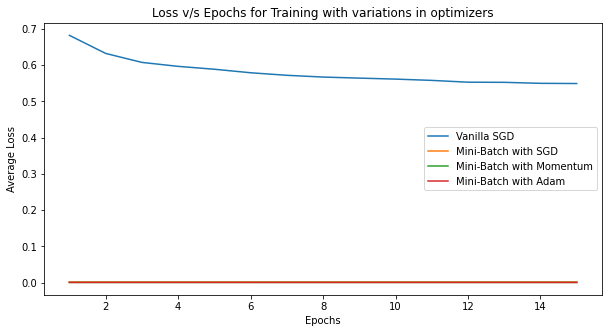

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_train_vanilla[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_2[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_3[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_4[i][1] for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.title("Loss v/s Epochs for Training with variations in optimizers")
plt.legend(["Vanilla SGD","Mini-Batch with SGD","Mini-Batch with Momentum","Mini-Batch with Adam"])
plt.show()

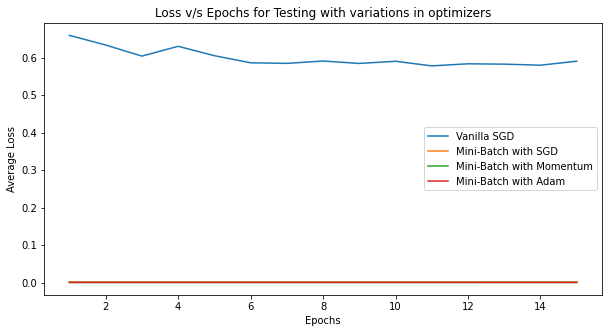

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_test_vanilla[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_2[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_3[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_4[i][1] for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.title("Loss v/s Epochs for Testing with variations in optimizers")
plt.legend(["Vanilla SGD","Mini-Batch with SGD","Mini-Batch with Momentum","Mini-Batch with Adam"])
plt.show()

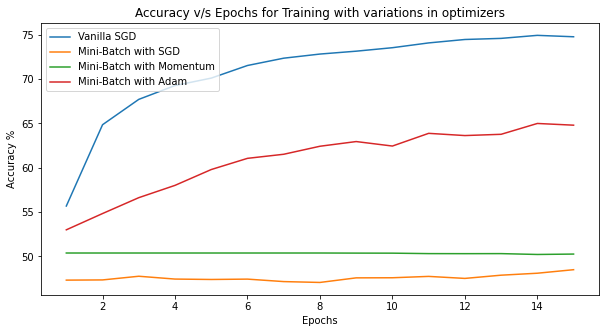

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_train_vanilla[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_2[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_3[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_4[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Accuracy %")
plt.title("Accuracy v/s Epochs for Training with variations in optimizers")
plt.legend(["Vanilla SGD","Mini-Batch with SGD","Mini-Batch with Momentum","Mini-Batch with Adam"])
plt.show()

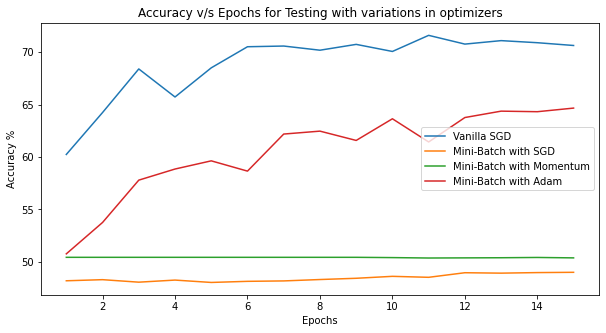

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_test_vanilla[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_2[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_3[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_4[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Accuracy %")
plt.title("Accuracy v/s Epochs for Testing with variations in optimizers")
plt.legend(["Vanilla SGD","Mini-Batch with SGD","Mini-Batch with Momentum","Mini-Batch with Adam"])
plt.show()

# Variations in Batches and Shuffling

In [ ]:
train_1,test_1 = data_preparation(Data_Prepare, '/content/drive/MyDrive/DL_Assignment_2/train', '/content/drive/MyDrive/DL_Assignment_2/test', train_df, test_df, (0,0,0),(1,1,1), Batch_Size = 1024, Shuffle=False )
train_2,test_2 = data_preparation(Data_Prepare, '/content/drive/MyDrive/DL_Assignment_2/train', '/content/drive/MyDrive/DL_Assignment_2/test', train_df, test_df, (0,0,0),(1,1,1), Batch_Size = 2048, Shuffle=True )
train_3,test_3 = data_preparation(Data_Prepare, '/content/drive/MyDrive/DL_Assignment_2/train', '/content/drive/MyDrive/DL_Assignment_2/test', train_df, test_df, (0,0,0),(1,1,1), Batch_Size = 512, Shuffle=True )

In [ ]:
model_batch_1= Model_Initializer()
model_batch_2= Model_Initializer()
model_batch_3= Model_Initializer()

optimizer_batch_1 = torch.optim.Adam(model_batch_1.parameters())
optimizer_batch_2 = torch.optim.Adam(model_batch_2.parameters())
optimizer_batch_3 = torch.optim.Adam(model_batch_3.parameters())

model_batch_1,output_train_batch_1,output_test_batch_1 = model(train_1,test_1,15,model_batch_1,loss_function,optimizer_batch_1)
model_batch_2,output_train_batch_2,output_test_batch_2 = model(train_2,test_2,15,model_batch_2,loss_function,optimizer_batch_2)
model_batch_3,output_train_batch_3,output_test_batch_3 = model(train_3,test_3,15,model_batch_3,loss_function,optimizer_batch_3)

## Variations in Mini-Batches

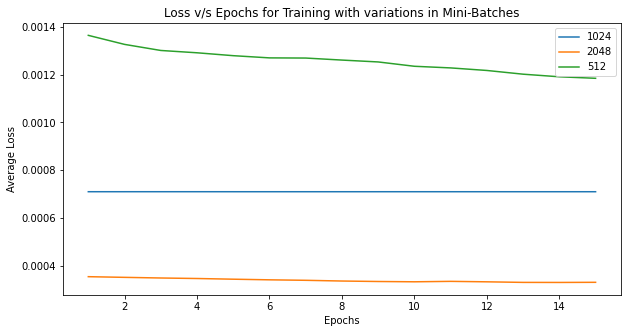

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_train_2[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_batch_2[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_batch_3[i][1] for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.title("Loss v/s Epochs for Training with variations in Mini-Batches")
plt.legend(["1024","2048","512"])
plt.show()

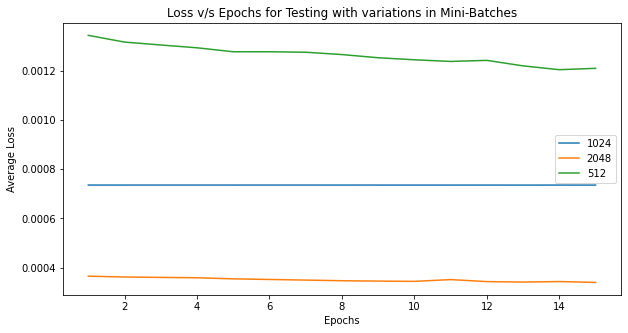

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_test_2[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_batch_2[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_batch_3[i][1] for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.title("Loss v/s Epochs for Testing with variations in Mini-Batches")
plt.legend(["1024","2048","512"])
plt.show()

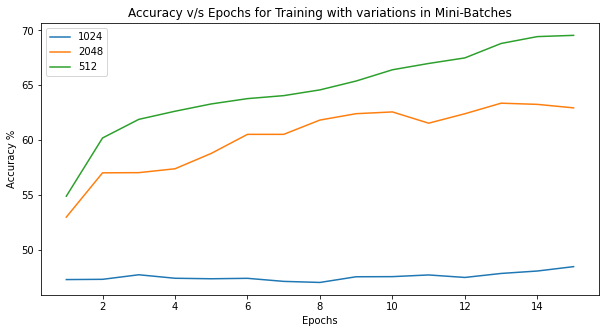

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_train_2[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_batch_2[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_batch_3[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Accuracy %")
plt.title("Accuracy v/s Epochs for Training with variations in Mini-Batches")
plt.legend(["1024","2048","512"])
plt.show()

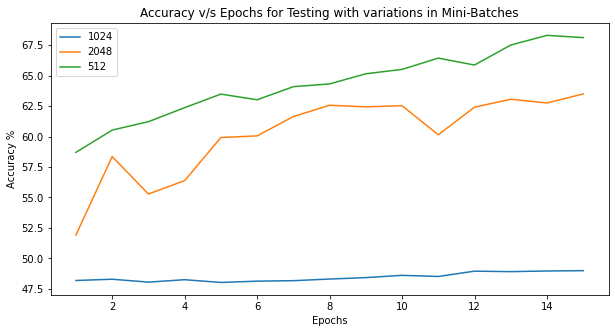

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_test_2[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_batch_2[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_batch_3[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Accuracy %")
plt.title("Accuracy v/s Epochs for Testing with variations in Mini-Batches")
plt.legend(["1024","2048","512"])
plt.show()

## Variations in Shuffling

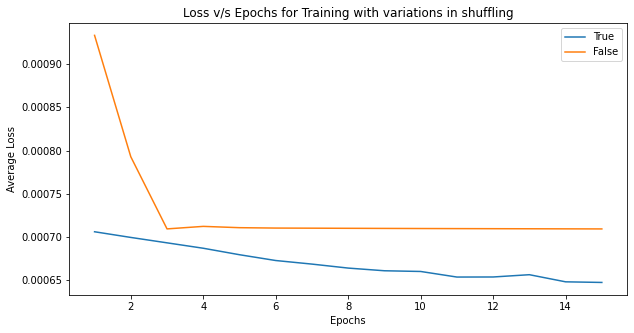

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_train_4[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_batch_1[i][1] for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.title("Loss v/s Epochs for Training with variations in shuffling")
plt.legend(["True","False"])
plt.show()

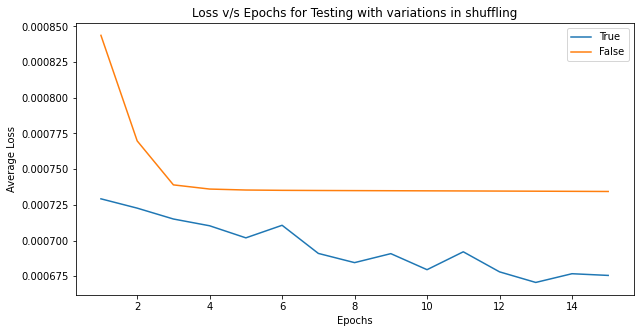

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_test_4[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_batch_1[i][1] for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.title("Loss v/s Epochs for Testing with variations in shuffling")
plt.legend(["True","False"])
plt.show()

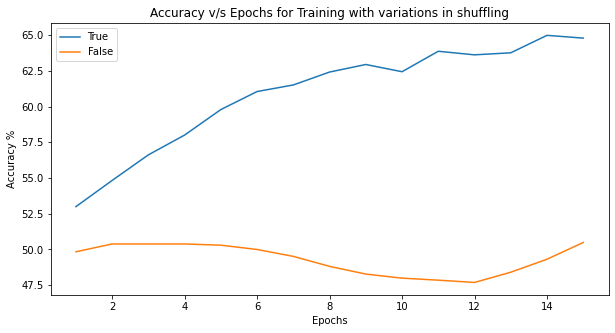

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_train_4[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_batch_1[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Accuracy %")
plt.title("Accuracy v/s Epochs for Training with variations in shuffling")
plt.legend(["True","False"])
plt.show()

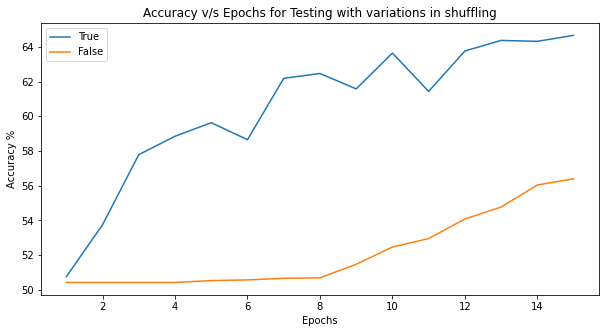

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_test_4[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_batch_1[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Accuracy %")
plt.title("Accuracy v/s Epochs for Testing with variations in shuffling")
plt.legend(["True","False"])
plt.show()

# Variations in Values of Beta-1

In [ ]:
model_beta_1_1= Model_Initializer()
model_beta_1_2= Model_Initializer()

optimizer_beta_1_1 = torch.optim.Adam(model_beta_1_1.parameters(), betas=(0.8,0.999))
optimizer_beta_1_2 = torch.optim.Adam(model_beta_1_2.parameters(), betas=(0.7,0.999))

model_beta_1_1,output_train_beta_1_1,output_test_beta_1_1 = model(train,test,15,model_beta_1_1,loss_function,optimizer_beta_1_1)
model_beta_1_2,output_train_beta_1_2,output_test_beta_1_2 = model(train,test,15,model_beta_1_2,loss_function,optimizer_beta_1_2)

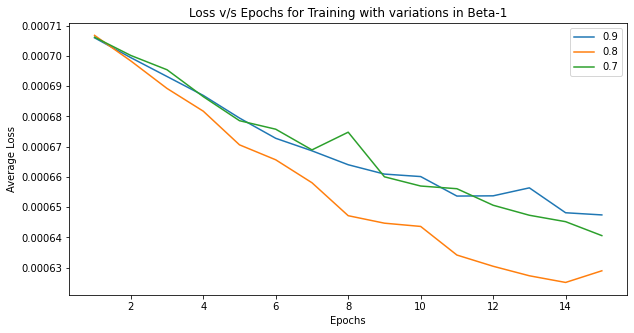

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_train_4[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_beta_1_1[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_beta_1_2[i][1] for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.title("Loss v/s Epochs for Training with variations in Beta-1")
plt.legend(["0.9","0.8","0.7"])
plt.show()

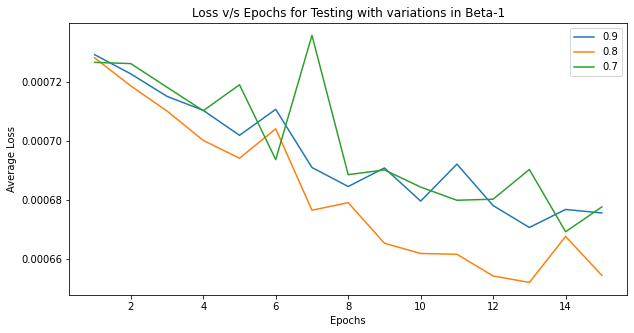

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_test_4[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_beta_1_1[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_beta_1_2[i][1] for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.title("Loss v/s Epochs for Testing with variations in Beta-1")
plt.legend(["0.9","0.8","0.7"])
plt.show()

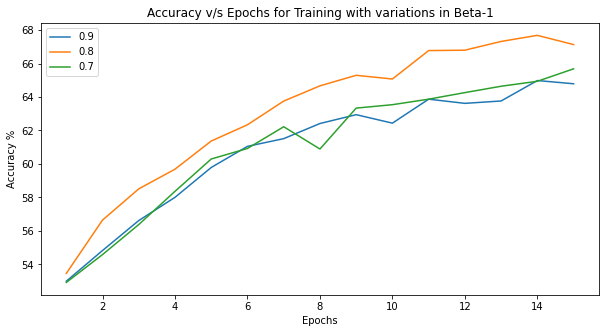

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_train_4[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_beta_1_1[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_beta_1_2[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Accuracy %")
plt.title("Accuracy v/s Epochs for Training with variations in Beta-1")
plt.legend(["0.9","0.8","0.7"])
plt.show()

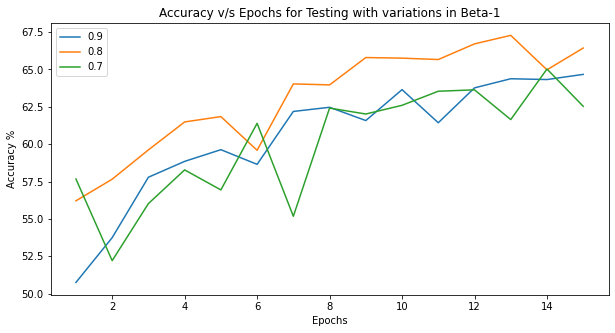

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_test_4[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_beta_1_1[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_beta_1_2[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Accuracy %")
plt.title("Accuracy v/s Epochs for Testing with variations in Beta-1")
plt.legend(["0.9","0.8","0.7"])
plt.show()

# Variations in Values of Beta-2

In [ ]:
model_beta_2_1= Model_Initializer()
model_beta_2_2= Model_Initializer()

optimizer_beta_2_1 = torch.optim.Adam(model_beta_2_1.parameters(), betas=(0.9,0.899))
optimizer_beta_2_2 = torch.optim.Adam(model_beta_2_2.parameters(), betas=(0.9,0.949))

model_beta_2_1,output_train_beta_2_1,output_test_beta_2_1 = model(train,test,15,model_beta_2_1,loss_function,optimizer_beta_2_1)
model_beta_2_2,output_train_beta_2_2,output_test_beta_2_2 = model(train,test,15,model_beta_2_2,loss_function,optimizer_beta_2_2)

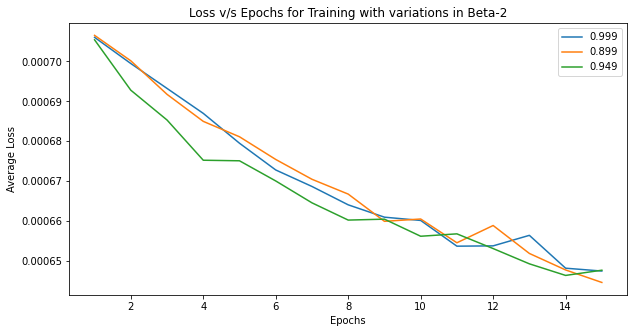

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_train_4[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_beta_2_1[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_beta_2_2[i][1] for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.title("Loss v/s Epochs for Training with variations in Beta-2")
plt.legend(["0.999","0.899","0.949"])
plt.show()

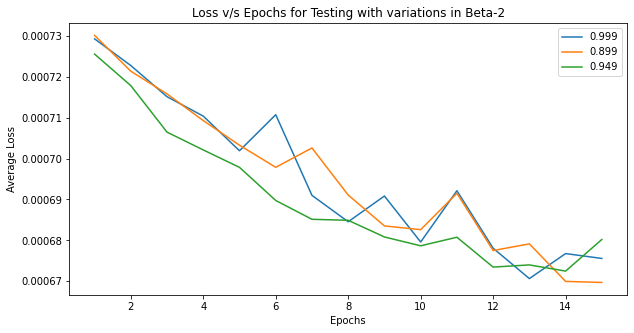

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_test_4[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_beta_2_1[i][1] for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_beta_2_2[i][1] for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.title("Loss v/s Epochs for Testing with variations in Beta-2")
plt.legend(["0.999","0.899","0.949"])
plt.show()

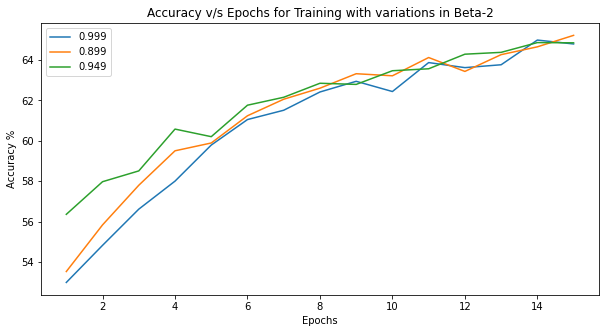

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_train_4[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_beta_2_1[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_train_beta_2_2[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Accuracy %")
plt.title("Accuracy v/s Epochs for Training with variations in Beta-2")
plt.legend(["0.999","0.899","0.949"])
plt.show()

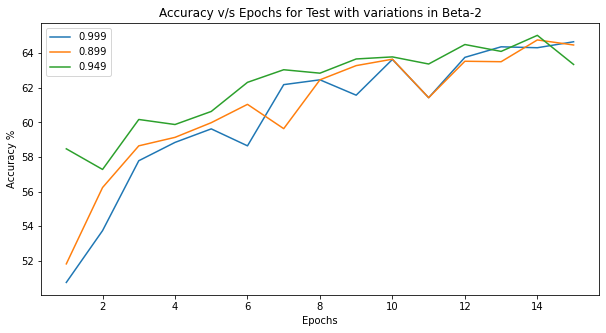

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([j for j in range(1,16)],[output_test_4[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_beta_2_1[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.plot([j for j in range(1,16)],[output_test_beta_2_2[i][2].cpu().detach().numpy() for i in range(0,15)])
plt.xlabel("Epochs")
plt.ylabel("Accuracy %")
plt.title("Accuracy v/s Epochs for Testing with variations in Beta-2")
plt.legend(["0.999","0.899","0.949"])
plt.show()